In [354]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
import pandas as pd
from os.path import exists as file_exists
import re
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [355]:

  
# Initialize GoogleDriveFile instance with file id
if (file_exists('Customer Info(Responses).xls') == False):
    
    # Initializing a GoogleAuth Object
    gauth = GoogleAuth()
    
    # client_secrets.json file is verified
    # and it automatically handles authentication
    gauth.LocalWebserverAuth()
    
    # GoogleDrive Instance is created using
    # authenticated GoogleAuth instance
    drive = GoogleDrive(gauth)
    file_obj = drive.CreateFile({'id': '1BeZVLRL4QPNgj640lZoyu2u9CSgCIRlWVDb0EwvSa6E'})
    file_obj.GetContentFile('Customer Info(Responses).xls',
         mimetype='application/vnd.openxmlformats-officedocument.spreadsheetml.sheet')
else:
    df = pd.read_excel('Customer Info(Responses).xls')
    df.drop_duplicates(inplace=True)
    #dedup check
    #dp = df.duplicated()
    #print(dp.sum())
    df.dropna(0,inplace=True)
    
    df.rename(columns={'Rate your satisfaction at our company.':'Satisfaction Rate', 'What is your average monthly income?' : 'Avg Monthly Income'},inplace=True)

C:\Users\abdul\AppData\Local\Temp\ipykernel_2900\2245982126.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df.dropna(0,inplace=True)


In [356]:
def extract_email_ID(string):
    email = re.findall(r'(.+?)@', string)
    
    return email[0] if email else np.nan

In [357]:
df['Avg Monthly Income'] = df['Avg Monthly Income'].replace('[\$,]', '', regex=True).astype(float)


In [358]:
def indices(lst, item):
   return [i for i, x in enumerate(lst) if x == item]

In [359]:
emails = []
for email in df['Email']:
    emails.append(extract_email_ID(email))

indiceslist = []
count = 0

for email in emails:
    indiceslist = indices(emails,email)
    if(len(indiceslist) > 1):
        count+=1
        for i in indiceslist:
            df.drop(i,inplace=True)



if(count == 0):
    print('No duplicate emails found!')
    

No duplicate emails found!


In [360]:
df.head()

,Timestamp,Name,Country,Age,Email,Address,Phone number,Gender,Satisfaction Rate,Avg Monthly Income
0,1/30/2023 17:57:49,Abdulrahman Afifi,Egypt,22,abdulrahmanafifi33@gmail.com,"Nardenk Sokağı, Abbasağa Mahallesi 34022, Ista...",905528499159,Male,4,25000.0
1,1/30/2023 18:05:17,Alex John,Argentina,34,alex.john35@gmail.com,"Ariensplein 1, Enschede, Netherlands",31684475461,Male,3,34000.0
2,1/30/2023 18:08:13,Rebecca David,London,45,rebecca49david@gmail.com,"Beşiktaş İstanbul ıhlamurdere caddesi, Aşık Ga...",415521701586,Female,1,12000.0


In [361]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['hour'] = df['Timestamp'].dt.hour
df['minute'] = df['Timestamp'].dt.minute
df['second'] = df['Timestamp'].dt.second
df.head()

,Timestamp,Name,Country,Age,Email,Address,Phone number,Gender,Satisfaction Rate,Avg Monthly Income,hour,minute,second
0,2023-01-30 17:57:49,Abdulrahman Afifi,Egypt,22,abdulrahmanafifi33@gmail.com,"Nardenk Sokağı, Abbasağa Mahallesi 34022, Ista...",905528499159,Male,4,25000.0,17,57,49
1,2023-01-30 18:05:17,Alex John,Argentina,34,alex.john35@gmail.com,"Ariensplein 1, Enschede, Netherlands",31684475461,Male,3,34000.0,18,5,17
2,2023-01-30 18:08:13,Rebecca David,London,45,rebecca49david@gmail.com,"Beşiktaş İstanbul ıhlamurdere caddesi, Aşık Ga...",415521701586,Female,1,12000.0,18,8,13


In [362]:
df['Phone number'] = [str(x) for x in df['Phone number']]
df['Country Code'] = [x[:2] for x in df['Phone number']]
df['Phone number'] = [x[-10:] for x in df['Phone number']]

##rearranging order of columns
column_titles = ['Timestamp','hour','minute','second', 'Name', 'Country', 'Age', 'Email', 'Address', 'Country Code', 'Phone Number',
 'Gender', 'Satisfaction Rate', 'Avg Monthly Income']
df = df.reindex(columns=column_titles)

df.head()

,Timestamp,hour,minute,second,Name,Country,Age,Email,Address,Country Code,Phone Number,Gender,Satisfaction Rate,Avg Monthly Income
0,2023-01-30 17:57:49,17,57,49,Abdulrahman Afifi,Egypt,22,abdulrahmanafifi33@gmail.com,"Nardenk Sokağı, Abbasağa Mahallesi 34022, Ista...",90,NaN,Male,4,25000.0
1,2023-01-30 18:05:17,18,5,17,Alex John,Argentina,34,alex.john35@gmail.com,"Ariensplein 1, Enschede, Netherlands",31,NaN,Male,3,34000.0
2,2023-01-30 18:08:13,18,8,13,Rebecca David,London,45,rebecca49david@gmail.com,"Beşiktaş İstanbul ıhlamurdere caddesi, Aşık Ga...",41,NaN,Female,1,12000.0


In [363]:
df.dtypes

Timestamp             datetime64[ns]
hour                           int64
minute                         int64
second                         int64
Name                          object
Country                       object
Age                            int64
Email                         object
Address                       object
Country Code                  object
Phone Number                 float64
Gender                        object
Satisfaction Rate              int64
Avg Monthly Income           float64
dtype: object

In [364]:

# skewness along the index axis
df.skew(axis = 0, skipna = True)

C:\Users\abdul\AppData\Local\Temp\ipykernel_2900\3405749701.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew(axis = 0, skipna = True)


hour                 -1.732051
minute                1.711498
second                1.652317
Age                  -0.130284
Country Code          1.538663
Phone Number               NaN
Satisfaction Rate    -0.935220
Avg Monthly Income   -0.534591
dtype: float64

In [365]:
z_score = stats.zscore(df['Avg Monthly Income'])
print(z_score)

0    0.147643
1    1.144231
2   -1.291874
Name: Avg Monthly Income, dtype: float64


In [ ]:
df_Male = df.groupby('Gender').get_group('Male')
df_Female = df.groupby('Gender').get_group('Female')

df_avgincome_male = df_Male['Avg Monthly Income'].mean()
df_avgincome_female = df_Female['Avg Monthly Income'].mean()

data1 = [df_avgincome_male, df_avgincome_female]

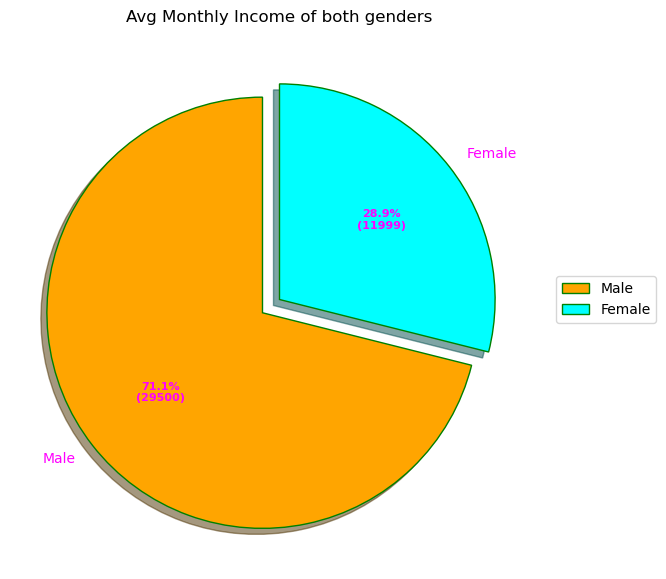